In [269]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../")
import library as lib
import math
from tqdm.auto import tqdm

In [408]:
f = open("./endsemfit.txt","r")
f = f.readlines()
f = list(map(lambda x: (int(x.split("\t")[0]),
                        int(x.split("\t")[1]),
                        int(x.split("\t")[2][:-1])),f))

In [409]:
time = [f[i][0] for i in range(len(f))]
x = [f[i][1] for i in range(len(f))] # Counts
del_x = [f[i][2] for i in range(len(f))] # Error

In [410]:
a1,a2,error_a1,error_a2,r2 = lib.fitting.linear_fit(x = x,
                                                    y = time,
                                                    dx = del_x)

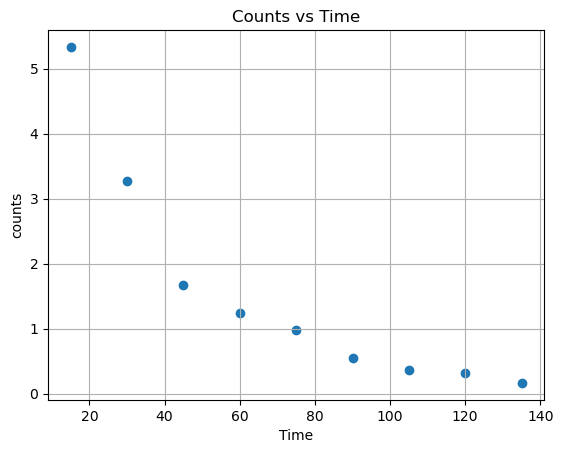

In [411]:
plt.scatter(time[1:],(np.array(x)/np.array(time))[1:]) #Avoiding the first one since it is noisy
plt.xlabel("Time")
plt.ylabel("counts")
plt.title("Counts vs Time")
plt.grid()
plt.show()

In [412]:
#Hence
X = time[1:]
Y = ((np.log(np.array(x)/np.array(time)))[1:]).tolist()
X_e = del_x[1:]

In [413]:
a1,a2,error_a1,error_a2,r2 = lib.fitting.linear_fit(x = X,
                                                    y = Y,
                                                    dx = X_e)

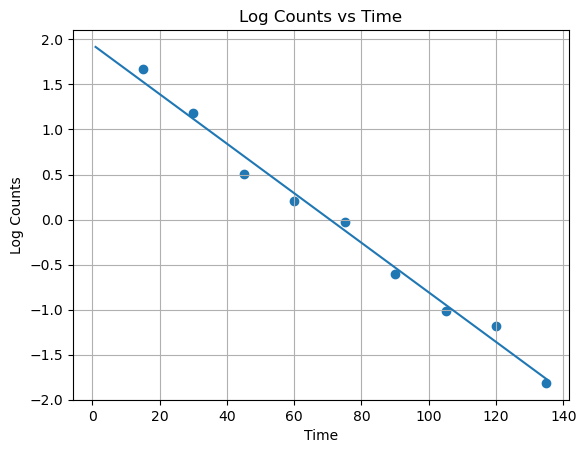

In [414]:
# Log count
plt.scatter(time[1:],(np.log(np.array(x)/np.array(time)))[1:]) #Avoiding the first one since it is noisy
plt.plot(time,np.array(time)*a2 +a1)
plt.xlabel("Time")
plt.ylabel("Log Counts")
plt.title("Log Counts vs Time")
plt.grid()
plt.show()

In [415]:
print("The coefficient a1 is",a1)
print("The coefficient a2 is",a2,)
print("The chi^2 value is",r2)

The coefficient a1 is 1.9444950783422306
The coefficient a2 is -0.02752569450894057
The chi^2 value is 0.6037150971682871


In [416]:
print(r'The value of lambda',-1*a2)
print("The life time is 1/lambda",-1/a2)

The value of lambda 0.02752569450894057
The life time is 1/lambda 36.32969186936198


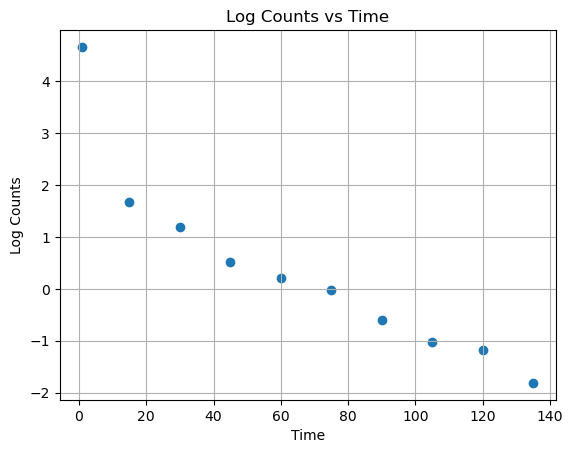

In [417]:
# Now using the noisy data
# Log count
plt.scatter(time,(np.log(np.array(x)/np.array(time)))) #Avoiding the first one since it is noisy
plt.xlabel("Time")
plt.ylabel("Log Counts")
plt.title("Log Counts vs Time")
plt.grid()
plt.show()

In [418]:
#Hence
X = time
Y = ((np.log(np.array(x)/np.array(time)))).tolist()
X_e = del_x

In [419]:
a1,a2,error_a1,error_a2,r2 = lib.fitting.linear_fit(x = X,
                                                    y = Y,
                                                    dx = X_e)

In [420]:
print("The coefficient a1 is",a1)
print("The coefficient a2 is",a2)
print("The chi^2 value is",r2)

The coefficient a1 is 2.692981923680718
The coefficient a2 is -0.03450441573467999
The chi^2 value is 0.32625976822564573


In [421]:
print(r'The value of lambda',-1*a2)
print("The life time is 1/lambda",-1/a2)

The value of lambda 0.03450441573467999
The life time is 1/lambda 28.98179779914116


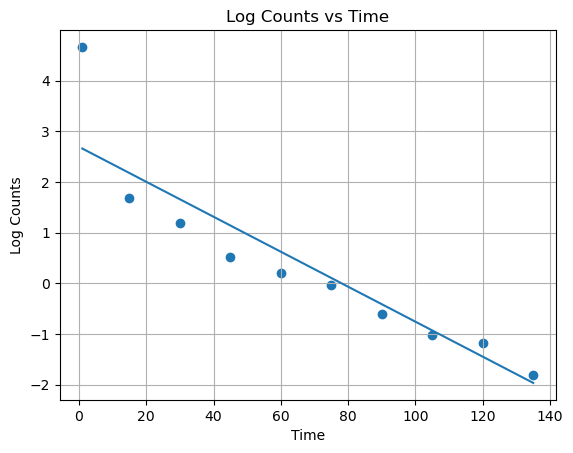

In [422]:
# Now using the noisy data
# Log count
plt.scatter(time,(np.log(np.array(x)/np.array(time))))
plt.errorbar(x=time,y=np.array(time)*a2 +a1)

plt.xlabel("Time")
plt.ylabel("Log Counts")
plt.title("Log Counts vs Time")
plt.grid()
plt.show()

In [442]:
expected = np.array(X)*a2+a1
chi_2 = np.sum((np.array(Y) - expected)**2/(expected))

In [444]:
# The number of degrees of freedom in this case is 8. Which corresponds to a value of 15.507, since this value
#is less than the critical value we consider the fit to be good.
print("The value of chi2 is",chi_2)

The value of chi2 is 2.387700894055982


# Question 2

In [366]:
# The van der waals equation is (p + a/V^2)*(V-b) = RT
R = 0.0821
p = 5.95
T = 300
b = 0.05422

def f1(v):
    R = 0.0821
    p = 5.95
    T = 300
    b =0.05422
    a = 6.254
    return R*T + p*b + a/v + (a*b)/v

def f2(v):
    R = 0.0821
    p = 5.95
    T = 300
    b =0.05422
    a = 6.254
    t1 = (R*T)/(v-b) - p
    t2 = (a/t1)
    return t2**0.5



In [370]:
# Using the first function for solving the equation
root1 = lib.root_finding.fixed_point.fixed_point_single_variable(g=f1,guess=1,eps=1e-05)

In [371]:
# Using the seconf function for solving the equation
root2 = lib.root_finding.fixed_point.fixed_point_single_variable(g=f2,guess=1,eps=1e-05)

In [372]:
print("Solution using function1",root1)
print("Solution using function2",root2)

Solution using function1 25.214093450640146
Solution using function2 0.18568450897501662


## The reason for two solutions can be attribuited to the fact that the equation in cubic in V hence it has 3 different solutions in our case we only explored 2 out of the 3 possible soultions.

# Question 5

In [59]:
matrix,_ = lib.io.reader("./endsemmat.txt")
a = lib.matrix.matrix(matrix)

In [60]:
guess = lib.matrix.matrix([[1],[2],[3],[4],[5]])
eigen_vector,eigen_value,iterations = lib.Eigen_Value_Power_Iteration(guess=guess,
                                                                          matrix = a,
                                                                          eps = 1e-3,
                                                                          MAX_ITER = 10000)

In [61]:
print(eigen_value)

3.7281657295109576


In [62]:
print(eigen_vector)

 0.28767935746014506	
-0.4990037996411103	
 0.5773491209102524	
-0.5009942194713772	
 0.2896697772904121	



In [63]:
def lambd_(k):
    a = -1
    c = -1
    b = 2
    n = 5
    return b + 2*((a*c)**0.5)*math.cos(k*math.pi/(n+1))

def v_(i,k):
    a = -1
    c = -1
    b = 2
    n = 5
    return 2*( ((c/a)**0.5)**k) *(math.sin(i*k*math.pi/(n+1)))

In [64]:
lambd_(1)

3.7320508075688776

In [65]:
v_1 = lib.matrix.matrix([[v_(i,1)] for i in range(1,6,1)])
lib.matrix.normalize_matrix_list(v_1)

In [79]:
v_2 = lib.matrix.matrix([[v_(i,2)] for i in range(1,6,1)])
lib.matrix.normalize_matrix_list(v_2)
print(v_2)

 0.5	
 0.5000000000000001	
 7.07050159149938e-17	
-0.49999999999999994	
-0.5	



In [80]:
U1 = np.array(v_1.matrix)
A = np.array(a.matrix) - eigen_value*U1@U1.T


In [88]:
print(a)

 2.0	-1.0	 0.0	 0.0	 0.0	
-1.0	 2.0	-1.0	 0.0	 0.0	
 0.0	-1.0	 2.0	-1.0	 0.0	
 0.0	 0.0	-1.0	 2.0	-1.0	
 0.0	 0.0	 0.0	-1.0	 2.0	



In [99]:
np.linalg.eig(A)

(array([-3.46021654,  1.        ,  2.        ,  3.73205081,  3.        ]),
 array([[-2.88675135e-01, -5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01, -5.00000000e-01],
        [-5.00000000e-01, -5.00000000e-01,  4.11095076e-16,
          5.00000000e-01,  5.00000000e-01],
        [-5.77350269e-01, -3.22219832e-16, -5.77350269e-01,
         -5.77350269e-01,  2.71946847e-16],
        [-5.00000000e-01,  5.00000000e-01,  3.29997042e-16,
          5.00000000e-01, -5.00000000e-01],
        [-2.88675135e-01,  5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01,  5.00000000e-01]]))

In [98]:
np.linalg.eig(np.array(a.matrix))[1][:,4]

array([-5.00000000e-01, -5.00000000e-01, -3.68521763e-16,  5.00000000e-01,
        5.00000000e-01])

In [100]:
np.linalg.eig(np.array(a.matrix))[0]

array([3.73205081, 3.        , 2.        , 0.26794919, 1.        ])

In [84]:
np.linalg.eig(A)

(array([-3.46021654,  1.        ,  2.        ,  3.73205081,  3.        ]),
 array([[-2.88675135e-01, -5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01, -5.00000000e-01],
        [-5.00000000e-01, -5.00000000e-01,  4.11095076e-16,
          5.00000000e-01,  5.00000000e-01],
        [-5.77350269e-01, -3.22219832e-16, -5.77350269e-01,
         -5.77350269e-01,  2.71946847e-16],
        [-5.00000000e-01,  5.00000000e-01,  3.29997042e-16,
          5.00000000e-01, -5.00000000e-01],
        [-2.88675135e-01,  5.00000000e-01,  5.77350269e-01,
         -2.88675135e-01,  5.00000000e-01]]))

In [71]:
np.array(v_1.matrix).T

array([[0.28867513, 0.5       , 0.57735027, 0.5       , 0.28867513]])

In [58]:
print(v_1)

 0.28867513459481287	
 0.5	
 0.5773502691896258	
 0.5000000000000001	
 0.28867513459481287	



# Question6

In [256]:
def sampling_dist(x):
    return np.random.randn()
def target_dist(x):
    return 0.5*(4-x**2)


In [257]:
s = lib.random.LGC(no_sample=1000000)
C = 1.2

In [258]:
samples = []
i = 0
accep = 0
rej = 0
while len(samples) < 20000:
    x = np.random.randn()
    if s[i] <= abs(target_dist(x)/(C*x)):
        samples.append(x)
        accep = accep +1
    else:
        rej = rej+1
    i = i+1

Text(0.5, 1.0, 'Target Distribution')

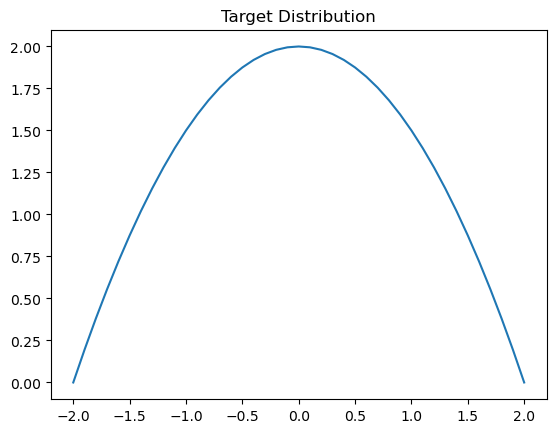

In [259]:
plt.plot(np.arange(-2,2.1,0.1),0.5*(4-np.arange(-2,2.1,0.1)**2), label = r"$y = e^{-2x}$")
plt.title("Target Distribution")

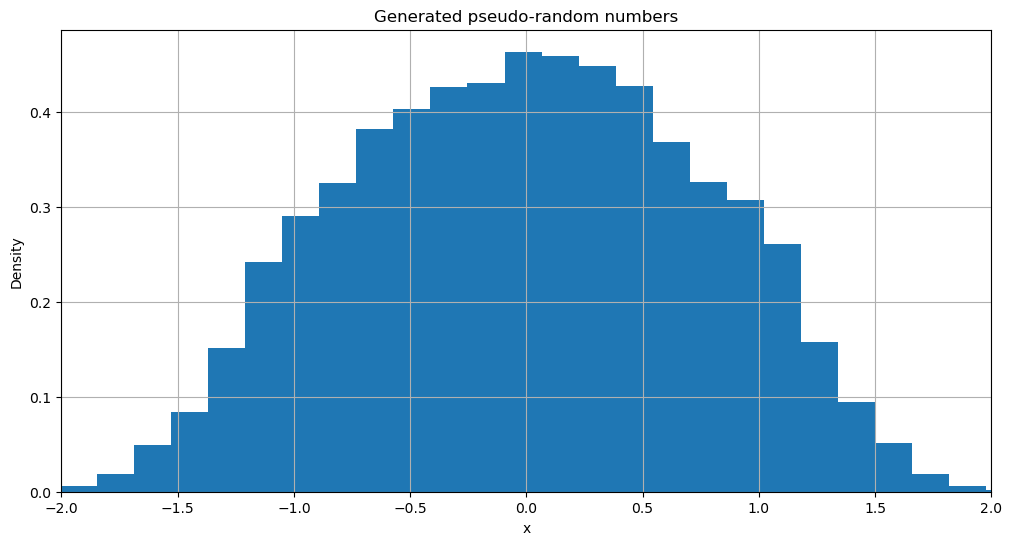

In [260]:
plt.figure(figsize = (12,6))
plt.hist(samples, bins=50, density=True)
# plt.plot(np.arange(-2,2.1,0.1),0.1*(4-np.arange(-2,2.1,0.1)**2), label = r"$y = e^{-2x}$")
plt.xlim(-2,2)
plt.ylabel('Density')
plt.grid()
plt.xlabel('x')
plt.title('Generated pseudo-random numbers')
# plt.legend()
plt.show()

In [261]:
print("Acceptance Percentage",accep/(accep+rej))

Acceptance Percentage 0.8684324793747286


In [262]:
# The target probabilty distribution match our expectations and has an acceptance
# rate of 0.86% for a C value of 1.2

# Question 7

In [289]:
# #-------------SHO
def p(rho,alpha):
    return 0.25*(alpha**2-rho**2)**2
# def E(rho,alpha):
#     return 0.5*(2/(alpha**2 - rho**2) + (rho**2))
def E(rho,alpha):
    return 0.5*(1/(alpha**2 - rho**2) + rho**2)


In [290]:
alpha_list = np.arange(0.4,200,5)
# alpha_list = [1.1]
energy_list = []
for alpha in tqdm(alpha_list):
    rho = 0.2
    step_size = 0.01
    rho_list = [rho]

    accep = 0
    rej = 0 
    for i in range(20000):
        old_prob = p(rho,alpha)
        rho_new = rho + (2*np.random.uniform()-1)*step_size
        new_prob = p(rho_new,alpha)
        gamma = np.random.uniform()
#         print(new_prob/old_prob)
        if gamma < min(1,new_prob/old_prob):
    #         print("Accept !")
            rho = rho_new
            rho_list.append(rho)
            accep = accep +1
        else:
    #         print("Reject")
            rej = rej + 1
    print("Acceptance Rate",(accep/(accep+rej)))
    rho_list = np.array(rho_list)
    Energy = E(rho_list,alpha)
    av_energy = Energy.mean()
    energy_list.append(av_energy)

  0%|          | 0/40 [00:00<?, ?it/s]

Acceptance Rate 0.98705
Acceptance Rate 0.99965
Acceptance Rate 0.99995
Acceptance Rate 0.99995
Acceptance Rate 0.99995
Acceptance Rate 1.0
Acceptance Rate 0.99995
Acceptance Rate 0.99995
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 0.99995
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0
Acceptance Rate 1.0


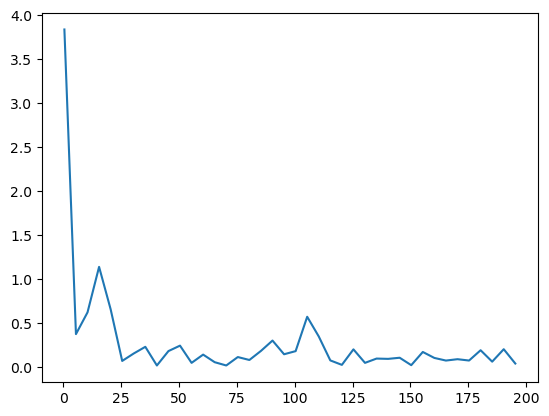

In [354]:
plt.plot(alpha_list,energy_list)
# plt.yscale("log")